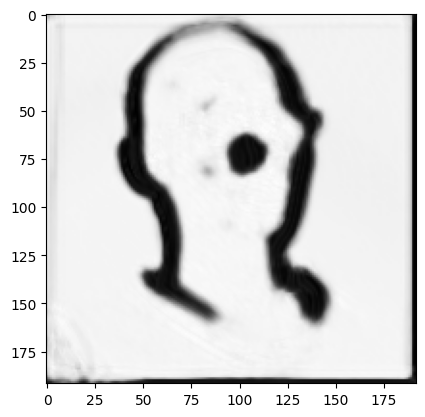

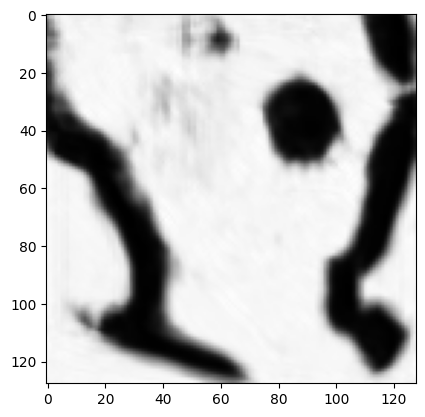

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import imutils

input_feature_file = 'input_feature_one.png'
template_feature_file = 'template_feature_one.png'
input_feature = cv2.imread(input_feature_file)
template_feature = cv2.imread(template_feature_file)
plt.imshow(input_feature)
plt.show()
plt.imshow(template_feature)
plt.show()

In [20]:
# use ORB to detect keypoints and extract (binary) local
# invariant features
maxFeatures = 500
keepPercent = 0.2

def align_images(image, template, maxFeatures=500, keepPercent=0.2, debug=False):
    orb = cv2.ORB_create(maxFeatures)
    (kpsA, descsA) = orb.detectAndCompute(image, None)
    (kpsB, descsB) = orb.detectAndCompute(template, None)
    # match the features
    method = cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING
    matcher = cv2.DescriptorMatcher_create(method)
    matches = matcher.match(descsA, descsB, None)
    matches = sorted(matches, key=lambda x:x.distance)
    # keep only the top matches
    keep = int(len(matches) * keepPercent)
    matches = matches[:keep]
    # check to see if we should visualize the matched keypoints
    if debug:
        matchedVis = cv2.drawMatches(image, kpsA, template, kpsB,
            matches, None)
        matchedVis = imutils.resize(matchedVis, width=1000)
        plt.imshow(np.asarray(matchedVis))
        plt.show()
    ptsA = np.zeros((len(matches), 2), dtype="float")
    ptsB = np.zeros((len(matches), 2), dtype="float")
    print(ptsA)
    print(ptsB)
    # loop over the top matches
    for (i, m) in enumerate(matches):
        # indicate that the two keypoints in the respective images
        # map to each other
        ptsA[i] = kpsA[m.queryIdx].pt
        ptsB[i] = kpsB[m.trainIdx].pt
    (H, mask) = cv2.findHomography(ptsA, ptsB, method=cv2.RANSAC)
    # use the homography matrix to align the images
    (h, w) = template.shape[:2]
    aligned = cv2.warpPerspective(image, H, (w, h))
    # return the aligned image
    return aligned

In [ ]:
aligned = align_images(input_feature, template_feature, debug=True)